# Gráficos de densidad y contorno

A veces es útil mostrar datos tridimensionales en dos dimensiones utilizando contornos o regiones codificadas por colores.
Hay tres funciones de Matplotlib que pueden ser útiles para esta tarea: ``plt.contour`` para gráficos de contorno, ``plt.contourf`` para gráficos de contorno rellenos, y ``plt.imshow`` para mostrar imágenes.

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np

## Visualización de una función tridimensional

Empezaremos demostrando un gráfico de contorno usando una función $z = f(x, y)$, usando la siguiente elección particular para $f$.

In [2]:
def f(x:float, y:float) -> float:
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

Se puede crear un gráfico de contorno con la función ``plt.contour``.
Toma tres argumentos: una rejilla de valores *x*, una rejilla de valores *y* y una rejilla de valores *z*.
Los valores *x* e *y* representan posiciones en el gráfico, y los valores *z* estarán representados por los niveles de contorno.
Quizá la forma más sencilla de preparar estos datos sea utilizar la función ``np.meshgrid``, que construye rejillas bidimensionales a partir de matrices unidimensionales:

In [3]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

Veámoslo ahora con un gráfico de contorno estándar de sólo líneas:

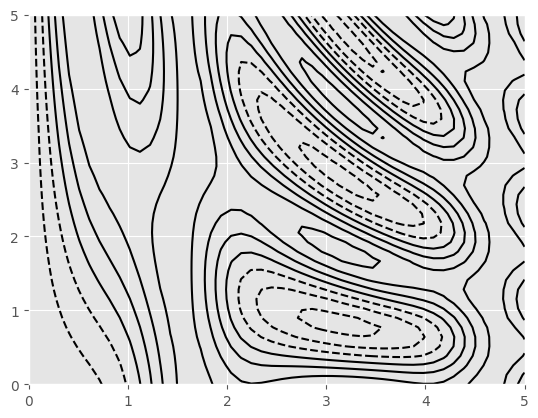

In [4]:
plt.contour(X, Y, Z, colors='black');

Tenga en cuenta que, por defecto, cuando se utiliza un solo color, los valores negativos se representan con líneas discontinuas y los positivos con líneas continuas.
Como alternativa, las líneas pueden codificarse por colores especificando un mapa de colores con el argumento ``cmap``.

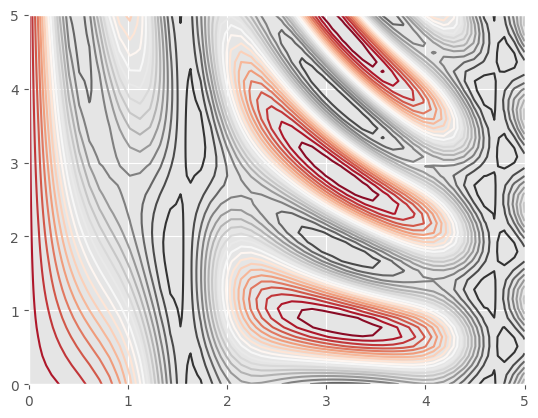

In [5]:
plt.contour(X, Y, Z, 20, cmap='RdGy');

Aquí elegimos el mapa de color ``RdGy`` (abreviatura de *Rojo-Gris*), que es una buena opción para datos centrados.
Matplotlib tiene una amplia gama de mapas de colores disponibles.

Nuestro gráfico se ve mejor, pero los espacios entre las líneas pueden distraer un poco.
Podemos cambiar esto cambiando a un gráfico de contorno relleno utilizando la función ``plt.contourf()``, que utiliza prácticamente la misma sintaxis que ``plt.contour()``.

Además, añadiremos un comando ``plt.colorbar()``, que crea automáticamente un eje adicional con información de color etiquetada para el gráfico:

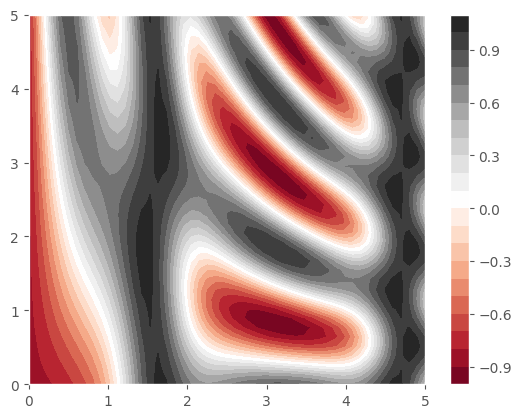

In [6]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

La barra de colores deja claro que las regiones negras son "picos", mientras que las rojas son "valles".

Por último, a veces puede ser útil combinar gráficos de contorno y gráficos de imagen.
Por ejemplo, aquí utilizaremos una imagen de fondo parcialmente transparente (con la transparencia definida mediante el parámetro ``alpha``) y sobretrazaremos los contornos con etiquetas en los propios contornos (utilizando la función ``plt.clabel()``):

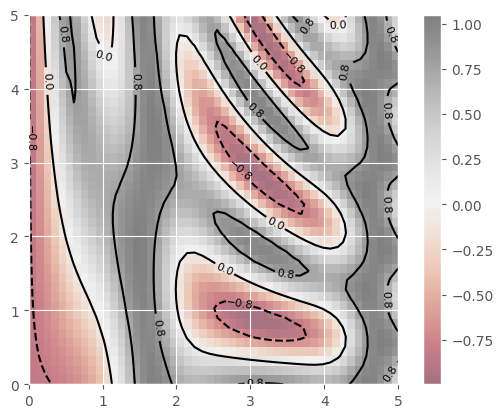

In [14]:
contours = plt.contour(X, Y, Z, 2, colors='black')      #el valor 2 indica el pixelado o algo así
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();

<!--NAVIGATION-->
< [Visualización de errores](3-Errorbars.ipynb) | [Histogramas, binnings y densidad](5-Histograms_y_Binnings.ipynb) >
